# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Спасибо тебе большое за оформление оглавления к проекту. 

### Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную data. 

In [67]:
import pandas as pd
import matplotlib.pyplot as plt



In [68]:
data = pd.read_csv('real_estate_data.csv')

**Выведем первые 20 строчек датафрейма `data` на экран.**

In [69]:
data.head(20)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


**Вот и первая проблема. Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Это произошло из-за разделителей в формате csv. csv — это Comma-Separated Values, или значения, разделённые запятыми.**

**Используем аргумент sep в функции read_csv(), чтобы разделить данные по столбцам,где разделитель будет "\t".**

In [71]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Построем гистограмму для всех числовых столбцов таблицы на одном графике.**

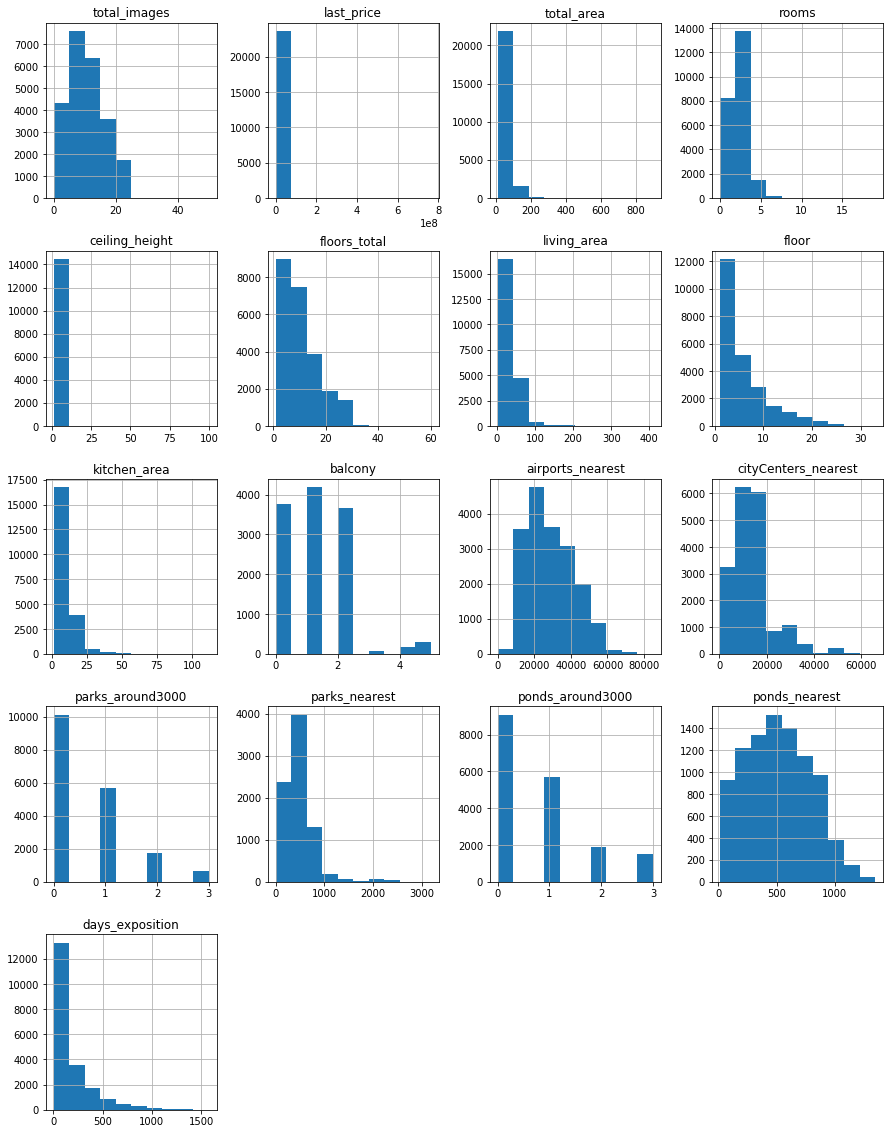

In [73]:
data.hist(figsize=(15, 20))
plt.show()

**Вывод: нам на аналитику даны 23 699 объвлений о продаже квартир.**

**В каждой строке таблицы — данные об объявлениях о продаже квартир. Часть колонок описывает саму квартиру: этажность, число балконов, высота потолков, площадь кухни, жилая площадь, общая площадь, цена, число комнат. Часть колонок о типе квартиры и доме: аппартаменты ли это или нет, студия или нет, свободная планировка или нет, сколько всего этажей в доме. Часть колонок о том где находится квартира: расстояние до аэропорта, до центра города, до парка, до водоема, число парков и водоемов поблизости. Остальные данные рассказывают о объявлении: дата публикации, число фотографий, сколько дней было размещено объявление.**

**Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных.**

**Чтобы двигаться дальше, нужно устранить проблемы в данных.**

### Предобработка данных

#### Найдем и изучим пропущенные значения в столбцах.

**Выведем количество пропущенных значений для каждого столбца.**

In [77]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [74]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


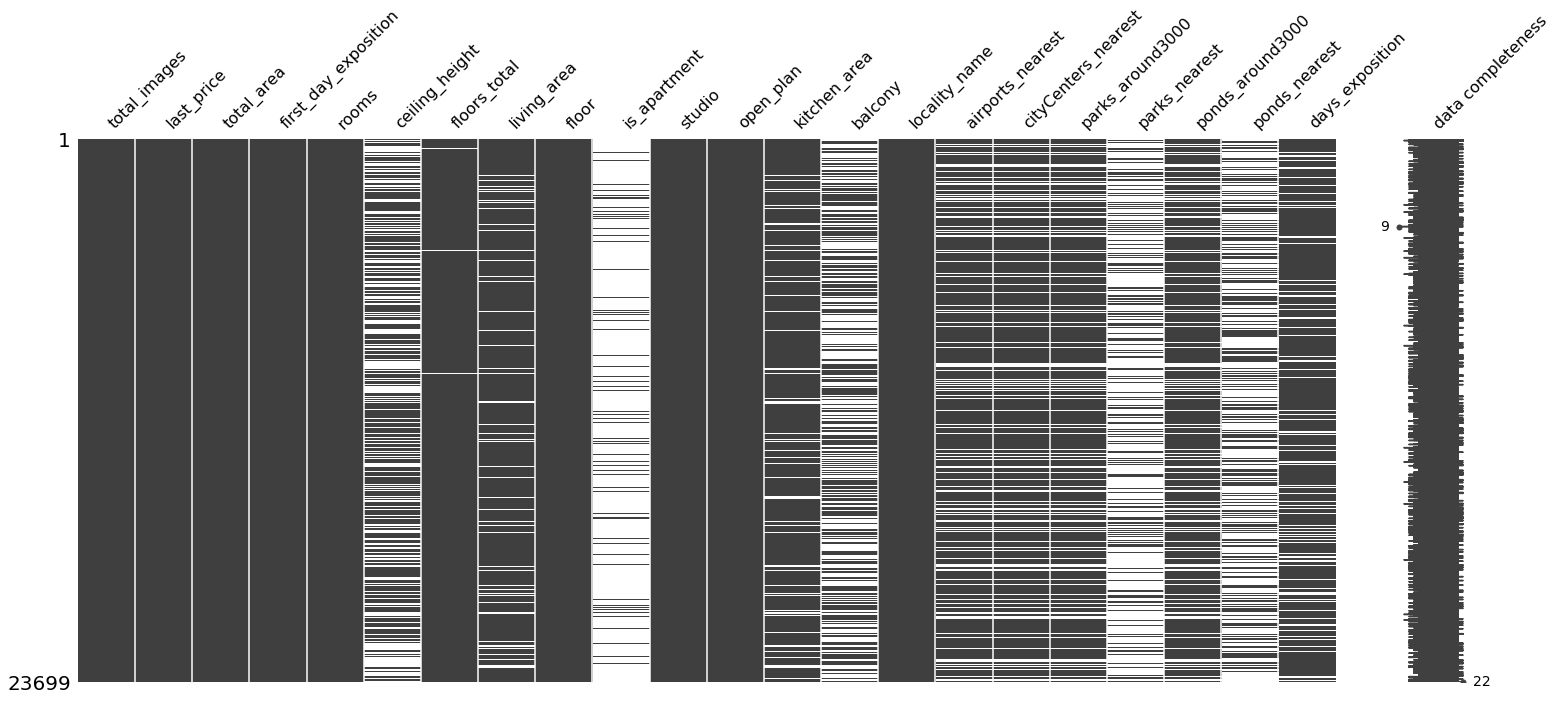

In [75]:
import missingno as msno
msno.matrix(data, labels=True)

In [76]:
data['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

**ceiling_height-отсутствует высота потолков, скорей всего не знает человек высоту потолков, либо мошенники,либо забыли вписать.**

**floors_total-всего этажей в доме.Скорей всего в доме 1 этаж,либо забыли вписать.**

**living_area-жилая площадь в кв.метрах, скорей всего не знает человек жилую площадь,либо мошенники,либо забыли вписать.**

**is_apartment-апартаменты.Скорей всего не апартаменты, потому что человек бы скорей всего знал,что это апппартаменты,так как это редкость, но и нельзя исключать,что человек бы не знал этого. И еще один вариант мошенники или забыли вписать.**

**kitchen_area-площадь кухни в кв.метрах-может быть ее нет,так как это студия.Оставим как есть.**

**balcony-число балконов. Можно заменить на 0,так как их скорей всего нет.**

**locality_name-название населенного пункта, предположение, что может мошенники разместили объявление, и не указав населенный пункт,это объявление будет показываться по всей России,тем самым больше вероятность «продать» квартиру.Либо человек не заполняя этот пункт подумал,что раз он размещает объявление в Санкт-Петербурге, то итак будет понятно,что это Петербург.**

**airports_nearest-расстояние до ближайшего аэропорта. Оставим как есть.**

**cityCenters_nearest-расстояние до центра города(м), либо мошенники, либо это деревня, поэтому по сути нету центра города.**

**parks_around3000-число парков в радиусе 3 км, оставим как есть, так как скорей всего их нет.**

**parks_nearest- расстояние до ближайшего парка (м),тоже оставим как есть.**

**ponds_around3000-число водоёмов в радиусе 3 км, оставим как есть, так как скорей всего их нет.**

**ponds_nearest-расстояние до ближайшего парка (м), оставим как есть, так как скорей всего их нет.**

**days_exposition- сколько дней было размещено объявление (от публикации до снятия). Как узнать это автоматические данные или пользователь заполняет их сам\? Похоже на то что это автоматические данные, тогда желательно пропуски заменить на ноль, так как думаю программа не пишит нолевой день.Проверим есть ли в этих столбцах нули,если нет, значит Nan и есть 0.**


In [77]:
data['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

Нулей нет ,зато есть Nan, значит заменяем на 0.

**заменим на 0 данный в столбцах balcony, days_exposition**

In [78]:
data = data.fillna(value={column:0 for column in ['balcony', 'days_exposition']})

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

#### Рассмотрим типы данных в каждом столбце

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

в столбце floors_total (всего этажей в доме), balcony количество балконов тип float64. Заменим на целочисленный тип,так как этажи и балконы считаются в целых чилсах. И проверим изменение.

In [81]:
data = data.astype({'floors_total': "Int32"})
data = data.astype({'balcony': "Int32"})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  Int32  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  Int32  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Переведем формат даты из object в datetime**

In [82]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int32         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты

In [84]:
data.duplicated().sum()

0

Явных дубликатов 0.

Посчитаем сколько уникальных значений в столбце с названиями и заменим повторяющиеся.

In [85]:
data['locality_name'].nunique()

364

In [86]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
     .replace(['деревня Федоровское', 'городской поселок Федоровское'], 'городской поселок Федоровское', regex=True)
    .replace(['село Никольское', 'Никольское', 'поселок городского типа Никольский'], 'поселок городского типа Никольский', regex=True)
    .replace(['поселок городского типа Советский', 'городской поселок Советский'], 'поселок городского типа Советский', regex=True)
    .replace(['городской поселок Большая Ижора', 'поселок городского типа Большая Ижора'], 'поселок городского типа Большая Ижора', regex=True)
    .replace(['городской поселок Павлово', 'поселок городского типа Павлово', 'село Павлово'], 'поселок городского типа Павлово', regex=True)
    .replace(['поселок городского типа Рахья', 'садовое товарищество Рахья'], 'поселок городского типа Рахья', regex=True)
    .replace(['поселок городского типа Приладожский', 'садовое товарищество Приладожский'], 'поселок городского типа Приладожский', regex=True)
    .replace(['деревня Калитино', 'поселок Калитино'], 'деревня Калитино', regex=True)
    .replace(['поселок Щеглово',  'деревня Щеглово'], 'деревня Щеглово', regex=True)
    .replace(['поселок Рабитицы',  'деревня Рабитицы'], 'деревня Рабитицы', regex=True)
    .replace(['поселок городского типа Рябово', 'поселок Рябово'], 'поселок городского типа Рябово', regex=True)
    .replace(['поселок городского типа Мга', 'городской поселок Мга'], 'поселок городского типа Мга', regex=True)
    .replace(['поселок городского типа Лесогорский',  'городской поселок Лесогорский'], 'поселок городского типа Лесогорский', regex=True)
    .replace(['поселок при железнодорожной станции Вещево', 'поселок станции Вещево'], 'поселок станции Вещево', regex=True)
    .replace(['поселок станции Громово', 'поселок Громово'],'поселок станции Громово', regex=True)
    .replace(['поселок городского типа Назия','городской поселок Назия'],'поселок городского типа Назия', regex=True)
    .replace(['поселок при железнодорожной станции Приветнинское',  'поселок станции Приветнинское'], 'поселок станции Приветнинское', regex=True)
    .replace(['деревня Зимитицы', 'поселок Зимитицы'],'деревня Зимитицы', regex=True)
    .replace(['поселок Лесное', 'коттеджный поселок Лесное'], 'поселок Лесное', regex=True)
    .replace(['поселок городского типа Рощино', 'городской поселок Рощино'], 'поселок городского типа Рощино', regex=True)
    .replace(['деревня Гарболово', 'поселок Гарболово'], 'деревня Гарболово', regex=True)
)
    
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'городской поселок Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок 

In [88]:
data['locality_name'].nunique()

307

Мы избавились от неявных дубликатов. И уникальных значений стало 307, а было 364.

**Вывод: мы заменили на 0 пропуски в столбцах с балконами и с количеством дней размещения объявления. Объединили похожие названия в названиях населенных пунктах, например: поселок городского типа и городской поселок, тем самым уменьшили количество уникальных значений названий населенных пунктво с 364 до 307. Строчки при этом мы удаляли, все данные остались на месте.**

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавем в таблицу новые столбцы со следующими параметрами:
цена одного квадратного метра-price_meter

день недели публикации объявления (0 — понедельник, 1 — вторник и так далее) - day_exposition_week;

месяц публикации объявления - day_exposition_month;

год публикации объявления - day_exposition_year;

тип этажа квартиры (значения — «‎первый», «последний», «другой») - type_floor;

расстояние до центра города в километрах (переведем из м в км и округлите до ближайших целых значений)-cityCenters_km.


In [89]:
data['price_meter']=(data['last_price']/data['total_area']).round(2)
data['price_meter']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_meter, Length: 23699, dtype: float64

In [90]:

data['day_exposition_week'] = pd.DatetimeIndex(data['first_day_exposition']).day_of_week
data['day_exposition_week']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: day_exposition_week, Length: 23699, dtype: int64

In [91]:
data['day_exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['day_exposition_month']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: day_exposition_month, Length: 23699, dtype: int64

In [92]:
data['day_exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['day_exposition_year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: day_exposition_year, Length: 23699, dtype: int64

In [93]:
def method_floor(data):
    try:
        if data['floor']==1:
            return 'первый'
        if data['floor']==data['floors_total']:
            return 'последний'
    except:
        return 'другой'
    return 'другой'
    

In [94]:
data['type_floor'] = data.apply(method_floor, axis =1)
data['type_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [95]:
data['cityCenters_km']=(data['cityCenters_nearest']/1000).round(2)
data['cityCenters_km']

0        16.03
1        18.60
2        13.93
3         6.80
4         8.10
         ...  
23694     4.23
23695      NaN
23696      NaN
23697    10.36
23698      NaN
Name: cityCenters_km, Length: 23699, dtype: float64

### Проведите исследовательский анализ данных

#### Проведем исследовательский анализ данных.

**Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров. Попробуем обработать аномалии в этом и других столбцах, если они есть. Если природа аномалии понятна и данные действительно искажены, то восстановим корректное значение. В противном случае удалите редкие и выбивающиеся значения.**

**Список параметров:**

**общая площадь;**

**жилая площадь;**

**площадь кухни;**

**цена объекта;**

**количество комнат;**

**высота потолков;**

**тип этажа квартиры («первый», «последний», «другой»);**

**общее количество этажей в доме;**

**расстояние до центра города в метрах;**

**расстояние до ближайшего парка.**

'Общая Площадь'

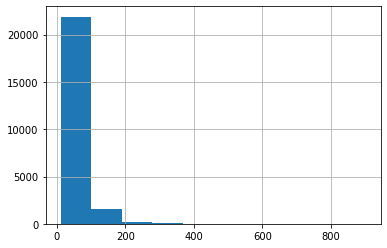

In [96]:
data['total_area'].hist()
'общая площадь'.title()

In [97]:
data[data['total_area']>800]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_exposition_week,day_exposition_month,day_exposition_year,type_floor,cityCenters_km
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,NaN,...,NaN,2.0,318.0,106.0,466666.67,2,12,2017,последний,7.88


Проверили значение больше 800 и поняли, что такое количество метров квадратных вполне реально для 12 комнат.

'Общая Площадь'

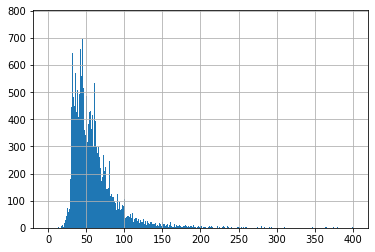

In [98]:
data['total_area'].hist(bins=400, range = (0, 400))
'общая площадь'.title()

Похоже на пуссоновское распределение.

In [99]:
data[data['total_area']>400]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_exposition_week,day_exposition_month,day_exposition_year,type_floor,cityCenters_km
660,3,49950000.0,483.90,2017-10-04,7,3.20,6,312.5,4,NaN,...,461.0,3.0,22.0,391.0,103223.81,2,10,2017,другой,0.94
3117,19,140000000.0,631.00,2019-03-30,7,NaN,5,NaN,5,NaN,...,NaN,2.0,210.0,0.0,221870.05,5,3,2019,последний,4.97
3676,12,28789000.0,441.98,2019-01-23,4,NaN,6,NaN,6,NaN,...,NaN,0.0,NaN,0.0,65136.43,2,1,2019,последний,5.18
4237,1,50000000.0,517.00,2017-10-14,7,NaN,4,332.0,3,NaN,...,477.0,2.0,540.0,0.0,96711.80,5,10,2017,другой,1.85
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6,409.0,3,NaN,...,767.0,0.0,NaN,14.0,110169.49,3,2,2019,другой,4.67
5893,3,230000000.0,500.00,2017-05-31,6,NaN,7,NaN,7,NaN,...,NaN,2.0,198.0,50.0,460000.00,2,5,2017,последний,5.30
6221,8,34000000.0,470.30,2018-01-14,4,NaN,3,248.7,3,NaN,...,852.0,3.0,122.0,179.0,72294.28,6,1,2018,последний,15.46
6621,20,99000000.0,488.00,2017-04-09,5,2.95,20,216.0,17,NaN,...,646.0,1.0,368.0,351.0,202868.85,6,4,2017,другой,4.60
8018,20,84000000.0,507.00,2015-12-17,5,4.45,7,301.5,7,True,...,110.0,0.0,NaN,1078.0,165680.47,3,12,2015,последний,5.74
9826,1,43185328.0,494.10,2017-05-12,1,2.85,12,NaN,3,NaN,...,592.0,0.0,NaN,5.0,87402.00,4,5,2017,другой,6.83


Похоже на нормальные значени по соотнешению с комнатами.

In [100]:
data[data['total_area']<30]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_exposition_week,day_exposition_month,day_exposition_year,type_floor,cityCenters_km
94,3,3500000.0,29.5,2019-04-26,1,2.5,5,15.60,2,NaN,...,NaN,0.0,NaN,4.0,118644.07,4,4,2019,другой,7.30
114,5,4000000.0,21.4,2019-02-07,1,2.9,8,8.30,7,NaN,...,488.0,1.0,286.0,0.0,186915.89,3,2,2019,другой,5.79
144,1,2450000.0,27.0,2017-03-30,0,NaN,24,15.50,2,NaN,...,NaN,NaN,NaN,181.0,90740.74,3,3,2017,другой,NaN
237,4,2438033.0,28.1,2016-11-23,1,NaN,<NA>,20.75,1,NaN,...,NaN,1.0,374.0,251.0,86762.74,2,11,2016,первый,17.37
296,4,1690000.0,28.0,2017-08-09,1,NaN,5,17.00,1,NaN,...,NaN,NaN,NaN,14.0,60357.14,2,8,2017,первый,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23579,7,2350000.0,24.8,2018-06-07,1,NaN,10,18.00,2,NaN,...,NaN,NaN,NaN,89.0,94758.06,3,6,2018,другой,NaN
23592,10,1450000.0,29.0,2017-11-11,0,NaN,9,18.00,8,NaN,...,NaN,NaN,NaN,82.0,50000.00,5,11,2017,другой,NaN
23610,16,2950000.0,29.0,2018-08-04,1,2.5,9,18.60,1,NaN,...,NaN,0.0,NaN,107.0,101724.14,5,8,2018,первый,12.94
23637,8,2350000.0,26.0,2018-06-26,0,NaN,25,17.00,4,NaN,...,NaN,NaN,NaN,207.0,90384.62,1,6,2018,другой,NaN


Обычно 30 квадратных метров одна комната, так, что квартиры 20 метров квадратных и больше, выглядит нормальным.

Проверим какиое количество квартир с площадью более 400  метров квадратных от общего числа квартир.

In [101]:
len(data[data['total_area']>400])/len(data['total_area'])*100

0.09705050846027258

Меньше 1 %, значит можно удалить эти данные из распределения

In [102]:
data = data[data['total_area']<400].reset_index(drop=True)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_exposition_week,day_exposition_month,day_exposition_year,type_floor,cityCenters_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,482.0,2.0,755.0,0.0,120370.37,3,3,2019,другой,16.03
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,NaN,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.60
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,NaN,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.93
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.80
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23668,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,796.0,3.0,381.0,0.0,72490.85,1,3,2017,другой,4.23
23669,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,NaN,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
23670,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,NaN,...,NaN,NaN,NaN,0.0,44091.71,6,2,2018,первый,NaN
23671,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,NaN,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.36


**По графику можно сказать, больше всего квартир с общей площадью 35квадратных метров.**

'Жилая Площадь'

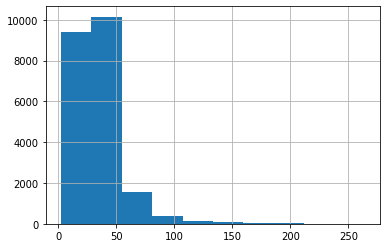

In [103]:
data['living_area'].hist()
'Жилая площадь'.title()

Тоже распределение выглядит нормальным.

'Жилая Площадь'

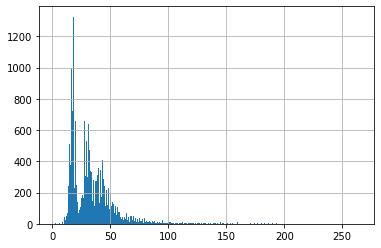

In [104]:
data['living_area'].hist(bins=400)
'Жилая площадь'.title()

'Жилая Площадь'

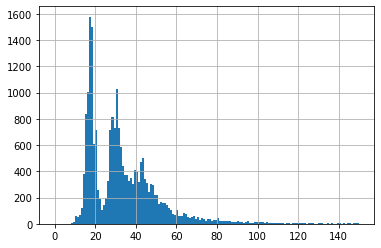

In [105]:
data['living_area'].hist(bins=150, range=(0, 150))
'Жилая площадь'.title()

**По графику можно сказать, больше всего квартир с жилой площадью 18 квадратных метров.**

'Площадь Кухни'

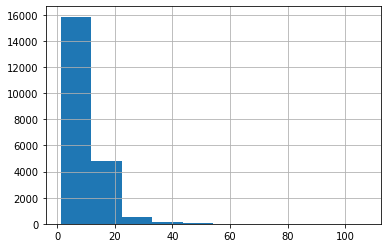

In [106]:
data['kitchen_area'].hist()
'Площадь кухни'.title()

'Площадь Кухни'

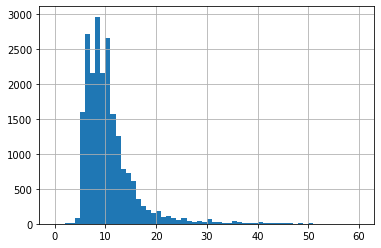

In [107]:
data['kitchen_area'].hist(bins=60, range=(0, 60))
'Площадь кухни'.title()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Вот кухни у нас совсем небольшие в данных. 

**По графику можно сказать, что больше всего квартир с кухней площадью 9 квадратных метров.**

'Цена'

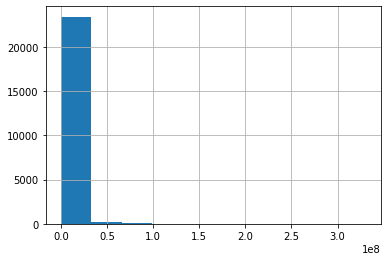

In [108]:
data['last_price'].hist()
'Цена'.title()

'Цена'

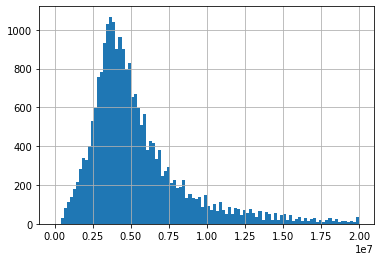

In [109]:
data['last_price'].hist(bins=100, range=(0,20000000))
'Цена'.title()

**Самая распространненая цена 2,75миллинов рублей.**

'Количество Комнат'

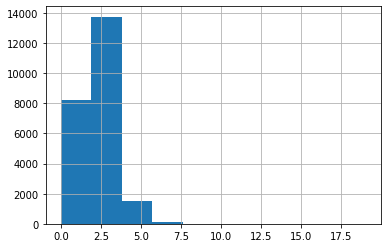

In [110]:
data['rooms'].hist()
'Количество комнат'.title()

'Количество Комнат'

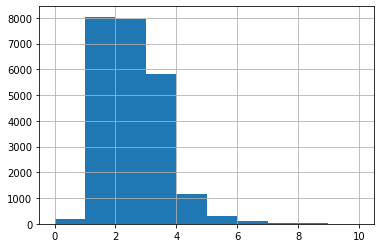

In [111]:
data['rooms'].hist(bins=10, range=(0,10))
'Количество комнат'.title()

**Чаще всего встречаются двухкомнатные и трехкомнатные квартиры.**

'Высота Потолков'

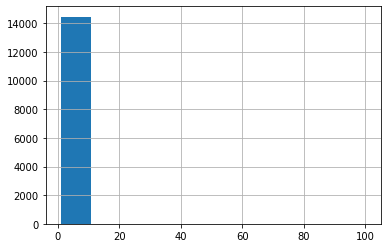

In [112]:
data['ceiling_height'].hist()
'Высота потолков'.title()

In [113]:
data['ceiling_height'].unique()


array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Во всех значениях выше 20 метров и меншьше 40, сместим знак запятой на один знак влево, так как это скорей всего ошиблись и хотели написать, например 2,75 метров, а не 27,5. А высота потолков обычно от 2 до 4 метров.

In [114]:
def height_fix(row):
    try:
        if 20.0<=row['ceiling_height']<=40.0:
            return row['ceiling_height']/10
    except:
        return row['ceiling_height']
    return row['ceiling_height']       

In [115]:
data['ceiling_height'] = data.apply(height_fix, axis =1)
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
         3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,   3.34,
      

**Посчитаем долю выбивающихся значений от общего числа значений. Доля потолков до 2 и от 8 метров(До 8 метров, так как обычно стены от 2 до 4 метров, но бывают комнаты двухэтажные).Если меньше будет меньше 5%, то удалим эти значения.**

In [116]:
(len(data[(data['ceiling_height']<2.0) | (data['ceiling_height']>8.0)])/len(data))*100

0.029569551810078993

In [118]:
data = data[(data['ceiling_height']>2.0) & (data['ceiling_height']<8.0) | (data['ceiling_height'].isna())].reset_index(drop=True)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_exposition_week,day_exposition_month,day_exposition_year,type_floor,cityCenters_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,482.0,2.0,755.0,0.0,120370.37,3,3,2019,другой,16.03
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,NaN,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.60
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,NaN,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.93
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.80
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23646,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,796.0,3.0,381.0,0.0,72490.85,1,3,2017,другой,4.23
23647,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,NaN,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
23648,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,NaN,...,NaN,NaN,NaN,0.0,44091.71,6,2,2018,первый,NaN
23649,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,NaN,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.36


**Теперь посмотрим график гистограммы без выбивающихся значений ,от 2 до 8 метров.**

'Высота Потолков'

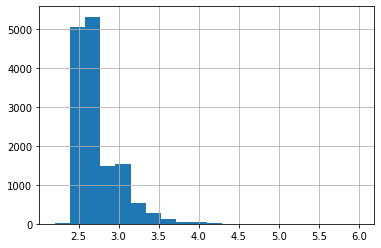

In [119]:
data['ceiling_height'].hist(bins=20)
'Высота потолков'.title()

**Чаще всего потолки встречаются с высотой 2,75 метров.**

'Тип Квартиры'

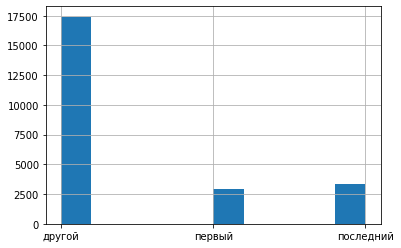

In [120]:
data['type_floor'].hist()
'Тип квартиры'.title()

**Чаще всего этаж встречается с типом "другой", реже всего с типом "первый".**

'Всего Этажей'

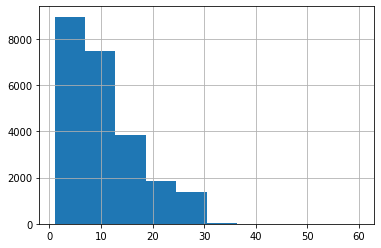

In [121]:
data['floors_total'].hist()
'Всего этажей'.title()

Попробуем сделать график точнее, чтобы было не 10, а 100 значений, и ограничим до 30 этажей, так как дальше идут уже редкие случаи, а мы хотим посмотреть самые частые.

'Всего Этажей'

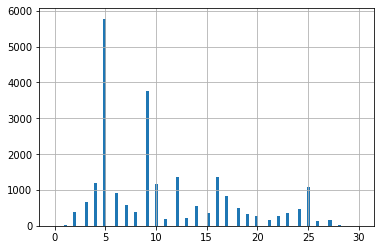

In [122]:
data['floors_total'].hist(bins=100, range=(0,30))
'Всего этажей'.title()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
У нас в данных много домов типовой застройки

Чаще всего встречаются пятиэтажки.

'Удаленность От Центра'

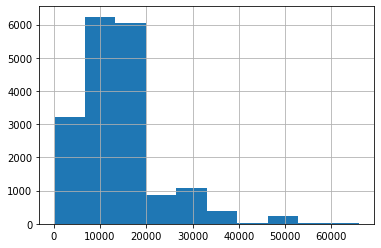

In [123]:
data['cityCenters_nearest'].hist()
'Удаленность от центра'.title()

Сократим разброс, выкинув выбросы, так как хотим выяснить какие самые частые значения.Сделаем с 0 до 40 000. Увеличим количство корзин до 100.

'Удаленность От Центра'

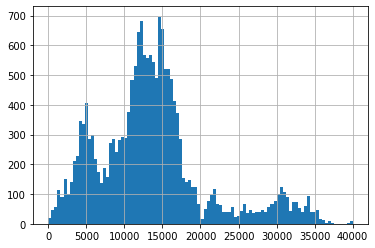

In [124]:
data['cityCenters_nearest'].hist(bins=100, range=(0, 40000))
'Удаленность от центра'.title()

Самое частое расстояние до центра 15 км.

'Удаленность От Парка'

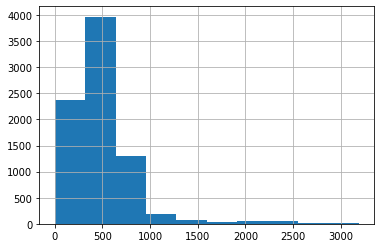

In [125]:
data['parks_nearest'].hist()
'Удаленность от парка'.title()

Самое частое расстояние до парка 500 метров.

**Вывод: больше всего квартир с общей площадью 35 квадратных метров,с жилой площадью 18 метров квадратных, с площадью кухни 9 квадратных метров. Меньше всего общая площадь - от 400 метров квадратных до 900. Самая распространненая цена 2,75миллинов рублей. Чаще всего встречаются двухкомнатные и трехкомнатные квартиры. Чаще всего встречаются квартиры на первом этаже или на последнем,с высотой 2,75 метров в пятиэтажке, с расстоянием до центра 15 км, а до центра 500 метров.Общий тренд такой, что чем больше площадь квартиры,жилая площадь,площадь кухни,цена,число комнат, высота потолков, общее количество этажей, расстояние до центра, расстояние до парка тем количество таких квартир уменьшается.**

#### Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

**Построим гистограмму.**

**Посчитаем среднее и медиану.**

'Сколько Продавалась Квартира'

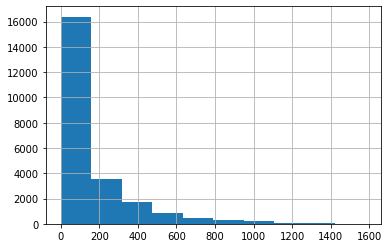

In [126]:
data['days_exposition'].hist()
'Сколько продавалась квартира'.title()

In [127]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

156.65286880047356
74.0


'Сколько Продавалась Квартира'

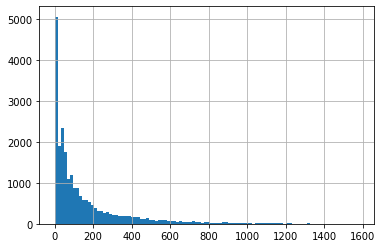

In [128]:
data['days_exposition'].hist(bins=100)
'Сколько продавалась квартира'.title()

'Сколько Продавалась Квартира'

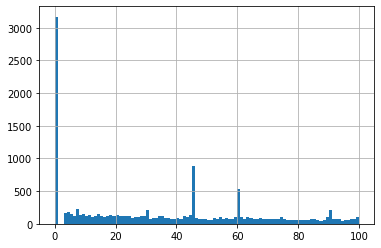

In [129]:
data['days_exposition'].hist(bins=100, range=(0, 100))
'Сколько продавалась квартира'.title()

Мы видим, что чаще всего продавались квартиры зв 0 дней. Думаю эти значения появились, потому что мы Nan заменили на ноль. Там как раз было 3181 пропущенное значение. На графике как раз 3 тысячи с чем-то таких объявлений. Так же мы видим, что выбиваются данные на 45 и 60 день. Думаю, это либо какие-то события в мире повлияли на продажу квартир,например появилась льготная ипотека для IT-ников, либо, может на сайте можно бесплатно держать объявление 45 или 60 дней, а потом они автоматически закрываются.

**Вывод: обычно продажа занимает 72 дня.Продажи в 5 дней можно считать быстрыми, а от 1200 дней — необычно долгими.**

#### Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта.

**Изучим, зависит ли цена от:**

**общей площади;**

**жилой площади;**

**площади кухни;**

**количества комнат;**

**тип этажа, на котором расположена квартира (первый, последний, другой);**

**даты размещения (день недели, месяц, год).**

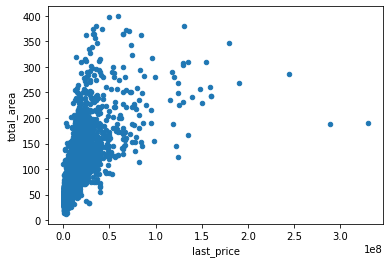

In [130]:
data.plot(x='last_price', y='total_area', kind='scatter')

**Если не обращать внимание на выбросы, то мы наблюдаем положительную корреляцию.Чем больше площадь квартиры, тем больше цена.**

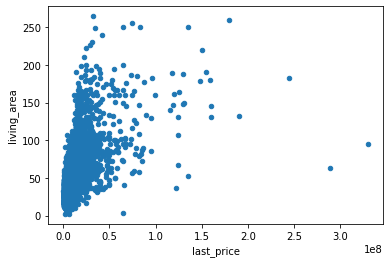

In [131]:
data.plot(x='last_price', y='living_area', kind='scatter')

**Если не обращать внимание на выбросы, то мы наблюдаем положительную корреляцию.Чем больше площадь жилой площади квартиры, тем больше цена.**

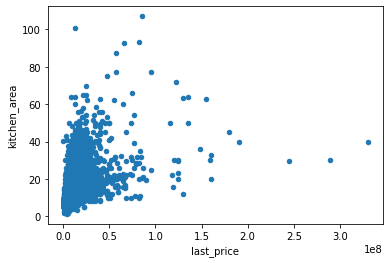

In [132]:
data.plot(x='last_price', y='kitchen_area', kind='scatter')

**Если не обращать внимание на выбросы, то мы наблюдаем положительную корреляцию.Чем больше площадь кухни в квартире, тем больше цена.**

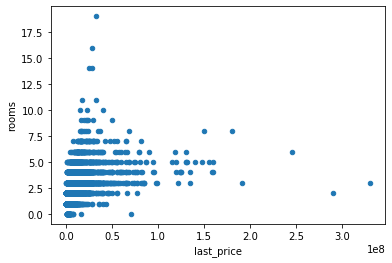

In [133]:
data.plot(x='last_price', y='rooms', kind='scatter')

**Если не обращать внимание на выбросы, то мы наблюдаем положительную корреляцию.Чем больше комнат в квартире, тем больше цена.**

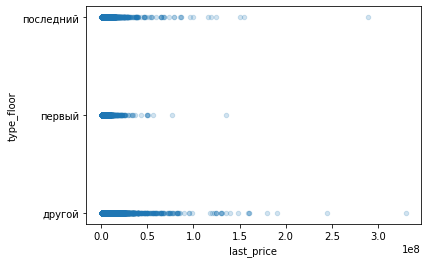

In [134]:
data.plot(x='last_price', y='type_floor', kind='scatter', alpha=0.2)

**Первый этаж самый дешевый, последний - второй по дороговизне, и все остальные этажи самые дорогие.**

In [135]:
data['day_exposition_week'].value_counts()

3    4287
1    4176
4    3995
2    3963
0    3607
5    1929
6    1694
Name: day_exposition_week, dtype: int64

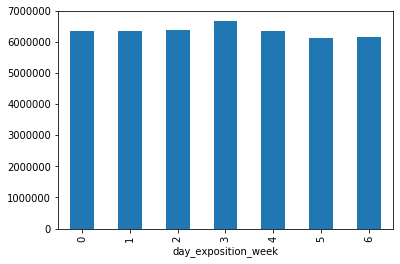

In [136]:
data.groupby(by= 'day_exposition_week')['last_price'].mean().plot.bar()

**Во все дни недели продаются квартиры примерно одинаково.**

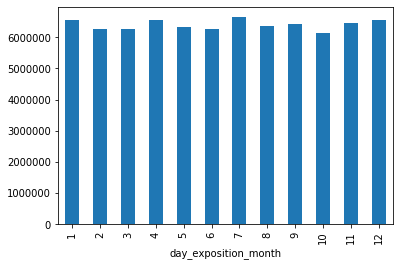

In [137]:
data.groupby(by= 'day_exposition_month')['last_price'].mean().plot.bar()

**Во все месяцы продаются квартиры примерно одинаково.**

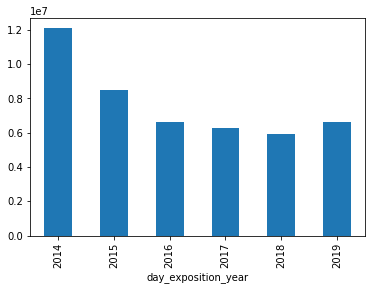

In [138]:
data.groupby(by= 'day_exposition_year')['last_price'].mean().plot.bar()

**До 2017 года наблюдалась положительная кореляция, с каждым годом цена квартиры увеличивалась, далее с 2017 года по 2019 с каждым годом цена уменьшалась.**

**Вывод: цена завист от общей площади, жилой площади, площади кухни, количества комнат. Здесть идет положительная корреляция.С увеличеним общей площади, жилой площади, площади кухни, количества комнат увеличивается и цена. Квартиры на первом этаже самые дешевые, последний - вторые по дороговизне, и все остальные этажи самые дорогие. День недели  и месяц, когда было выставлено объявление и не влияют на цену, а вот год - до 2017 года наблюдалась положительная кореляция, с каждым годом цена квартиры увеличивалась, далее с 2017 года по 2019 с каждым годом цена уменьшалась.**

 Проанализируем стоимость квадратного метра

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построем сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [140]:
a = pd.pivot_table(data, values='price_meter', index='locality_name', aggfunc=['mean', 'count'])
a.columns = ['mean_price_meter','count_ad']
a=a.reset_index()
a=a.sort_values(by='count_ad', axis=0, ascending=False).reset_index(drop=True).loc[0:9]
a['mean_price_meter'] = a['mean_price_meter'].round(2)
a


,locality_name,mean_price_meter,count_ad
0,Санкт-Петербург,114511.93,15685
1,поселок Мурино,85681.76,556
2,поселок Шушары,78677.36,440
3,Всеволожск,68719.32,397
4,Пушкин,103125.82,369
5,Колпино,75424.58,338
6,поселок Парголово,90175.91,327
7,Гатчина,68746.15,307
8,деревня Кудрово,92473.55,299
9,Выборг,58238.14,235


**Вывод: самая всокая цена за квадратный метр в Санкт-Петербурге, самая низкая цена-во Всеволожске.**

#### Посмотрим, как стоимость объектов зависит от расстояния до центра города.

**Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города — построем график изменения средней цены для каждого километра от центра Петербурга.**

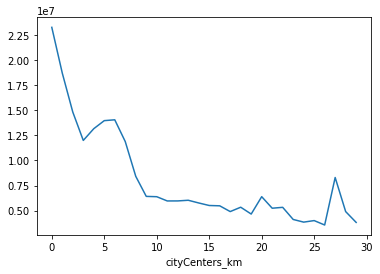

In [141]:
data[data['locality_name']=='Санкт-Петербург'].groupby(data['cityCenters_km'].dropna().astype('int'))['last_price'].mean().plot()

**Вывод: с увеличенением удаленности от центра увеличивается цена квартиры.**

Первый пик, примерно, на 5 км, вероятно,это какое-то кольцо с удобными остановками, может быть Обвобной канал и набережные. Следующий пик идет ,скорей всего близко ко мкаду на 18 км. А с 25 км, растет цена, так как это пригород начинается.

### Общий вывод

**Исследование объявлений о продаже квартир началось с предобработки данных.**

**Мы проверили и исправили соотвествие типов каждому столбцу, формат даты перевели из object в datetime, количество балконов и этажей перевели в целочисленный тип.**

**Убрали видающиеся значения в столбце с высотой потолков.**

**Вывод: больше всего квартир с общей площадью 35 квадратных метров,с жилой площадью 18 метров квадратных, с площадью кухни 9 квадратных метров. Меньше всего общая площадь - от 400 метров квадратных до 900. Самая распространненая цена 2,75миллинов рублей. Чаще всего встречаются двухкомнатные и трехкомнатные квартиры. Чаще всего встречаются квартиры на первом этаже или на последнем,с высотой 2,75 метров в пятиэтажке, с расстоянием до центра 15 км, а до центра 500 метров.Общий тренд такой, что чем больше площадь квартиры,жилая площадь,площадь кухни,цена,число комнат, высота потолков, общее количество этажей, расстояние до центра, расстояние до парка, тем больше количество таких квартир уменьшается.**

**Продажа занимает 72 дня.Продажи в 5 дней можно считать быстрыми, а от 1200 дней — необычно долгими.**

**Цена завист от общей площади, жилой площади, площади кухни, количества комнат,удаленности от центра. Здесть идет положительная корреляция.С увеличеним общей площади, жилой площади, площади кухни, количества комнат,удаленности от центра увеличивается и цена. Квартиры на первом этаже самые дешевые, последний - вторые по дороговизне, и все остальные этажи самые дорогие. День недели  и месяц, когда было выставлено объявление и не влияют на цену, а вот год - до 2017 года наблюдалась положительная кореляция, с каждым годом цена квартиры увеличивалась, далее с 2017 года по 2019 с каждым годом цена уменьшалась.**

**Самая высокая цена за квадратный метр в Санкт-Петербурге, самая низкая цена-во Всеволожске.**


**Рекомендациями по улучшению сбора данных и системы скоринга:**

**столбец с датой собирать в типе datetime;**

**столбец с балконами и этажами собирать в типе int;**

**сделать столбец с балконами обязательным к заполнению**